In [1]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
rbf = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

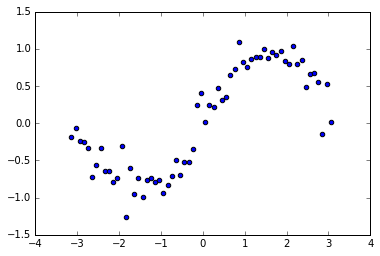

In [15]:
X = np.arange(-np.pi, np.pi, 0.1)[:, None]
y = np.sin(X) + 0.2 * np.random.randn(*X.shape)

plt.scatter(X, y)

 /usr/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


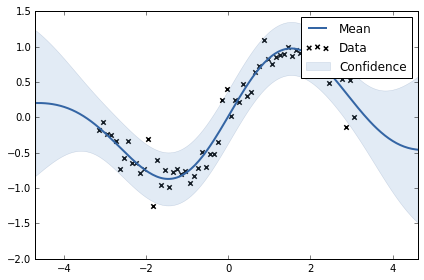

In [37]:
full = GPy.models.GPRegression(X, y, rbf)
full.optimize()
full.plot()

 /usr/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


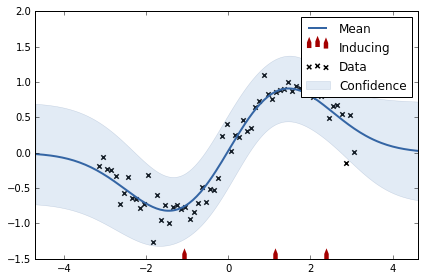

In [42]:
sparse = GPy.models.SparseGPRegression(X, y, rbf, num_inducing=3)
sparse.optimize()
sparse.plot()

In [23]:
np.savetxt(
    "spgp_data.dat",
    np.hstack((X, y)),
    delimiter='\t',
    comments='',
    header='\t'.join(["X", "y"])
)

In [38]:
Xt = np.arange(-4.5, 4.5, 0.05)[:, None]

In [39]:
mu, sigma = full.predict(Xt)
std = np.sqrt(sigma)

np.savetxt(
    "spgp_full.dat",
    np.hstack((Xt, mu, std)),
    delimiter='\t',
    comments='',
    header='\t'.join(["X", "y", "y_std"])
)

In [43]:
mu, sigma = sparse.predict(Xt)
std = np.sqrt(sigma)

np.savetxt(
    "spgp_sparse.dat",
    np.hstack((Xt, mu, std)),
    delimiter='\t',
    comments='',
    header='\t'.join(["X", "y", "y_std"])
)

In [41]:
np.savetxt(
    "spgp_sparse_inputs.dat",
    sparse.inducing_inputs,
    delimiter='\t',
    comments='',
    header='\t'.join(["X"])
)